<a href="https://colab.research.google.com/github/MasahiroAraki/Informatics-I/blob/master/Python/info_I_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 学習14 応用的プログラム

## リスト

*  リストとは  
  * 複数の値を一つの名前（変数名）と通し番号（添字）によって管理する仕組み  
  * 例： a=[56,3,62,17,87]　　　a[0]:56, a[1]:3,...
  * リストの中にあるひとつひとつの値を要素という
  * 要素に付けられた0から始まる番号を添字という


図表2  リスト内の特定の要素を取り出す

In [22]:
a = [56,3,62,17,87,22,36,83,21,12] # リストa の定義
goukei = 0
goukei = a[3] + a[7]
print(goukei)

100


図表3  リスト内のすべての要素に対する処理

In [23]:
a = [56,3,62,17,87,22,36,83,21,12] 
goukei = 0
for i in range(0,10,1):
  goukei = goukei + a[i]
print(goukei)

399


こちらの方がPythonらしい書き方

In [24]:
a  =[56,3,62,17,87,22,36,83,21,12] 
goukei = 0
for i in a:
  goukei += i
print(goukei)

399


やりたいことをそのまま表したコード

参考：[Pythonの組み込み関数](https://docs.python.org/ja/3/library/functions.html)

In [25]:
a  =[56,3,62,17,87,22,36,83,21,12] 
print(sum(a))

399


補足： 辞書型のデータ構造


* 辞書とは  
複数の値を一つの名前（変数名）と文字列（キー）によって管理する仕組み  
例: age = {'松賀':18, '北山':24}　　　age['松賀']:18, age['北山']:24
* 辞書を使う理由
  * 複数の値をリストのような順序ではなく、値の意味を表すキーと対応づけて管理したい  
  * 特定のキーと対応づけられた値を高速に検索したい  
例：数万人のデータがあるときに、キー「'松賀'」の年齢を検索


In [26]:
c={'add1':'東京都', 'add2':'千代田区'}
c['add3'] = '１－１'

In [27]:
c

{'add1': '東京都', 'add2': '千代田区', 'add3': '１－１'}

In [28]:
c['add1']+c['add2']

'東京都千代田区'

## 乱数

* 乱数とは
  * ある一定の範囲内において，すべての数が等確率で現れるような数
  * コンピュータで生成する乱数は計算によって値を生成しているので、擬似乱数とよばれる
  * 乱数を用いることで実行するたびに処理内容が変わるようなことが実現できるので、シミュレーションなどに応用できる


図表4 0から9までの乱数を発生させて数当てゲーム

In [29]:
import random #random モジュールを読み込む
a = 5
r = random.randrange(10) #0 ～ 9 までの整数をランダムに発生
if a == r:
  print(" 当たり")
elif a > r:
  print("a の方が大きい")
elif a < r:
  print("a の方が小さい")

a の方が大きい


図表5 0から9までの乱数を1から10までに変更するプログラム


In [30]:
import random
r = random.randrange(10)+1
print(r)

6


## 関数

* 関数とは
  *  引数を受け取り、何らかの処理を行って、戻り値を返すもの
  * 大規模なプログラムを開発する際に、機能毎に切り分けて小さな関数として開発を行う
  * 作成した関数は何度でも呼び出すことができ、再利用が可能になる。



図表9  関数で分割したプログラムの例

In [31]:
def listgoukei(a): # 合計を求める関数listgoukei を作成
  goukei = 0
  for i in a:
    goukei += i
  return goukei

a = [56,3,62,17,87,22,36,83,21,12]
goukei = listgoukei(a) # 作った関数listgoukei を呼び出し
print(goukei)

399


## WebAPI

* API (Application Programming Interface) とは
  * 共通して使われる複雑な処理を関数に近い形でまとめて提供するもの
* WebAPIとは
  * インターネット上のサービスやビッグデータへのAPI 
  * Webの通信方式を利用したアクセス機能を提供している



図表11

In [32]:
import requests
import json
url = 'https://zipcloud.ibsnet.co.jp/api/search' # 使用するWebAPI のURL
param = {'zipcode': '606-8001'} #WebAPI の引数
res = requests.get(url, params=param) #WebAPI の戻り値がres へ
response = json.loads(res.text)
address = response['results'][0]
print(address['address1'] + address['address2'] + address['address3'])

京都府京都市左京区山端柳ケ坪町


In [33]:
response

{'message': None,
 'results': [{'address1': '京都府',
   'address2': '京都市左京区',
   'address3': '山端柳ケ坪町',
   'kana1': 'ｷｮｳﾄﾌ',
   'kana2': 'ｷｮｳﾄｼｻｷｮｳｸ',
   'kana3': 'ﾔﾏﾊﾞﾅﾔﾅｶﾞﾂﾎﾞﾁｮｳ',
   'prefcode': '26',
   'zipcode': '6068001'}],
 'status': 200}

# 学習15 アルゴリズムの比較

## 線型探索

リストを先頭から順に比較しながら探索値に一致するデータを探し出す探索方法

「アルゴリズムビジュアル大事典」より
https://yutaka-watanobe.github.io/star-aida/1.0/algorithms/linear_search/anim.html

In [34]:
def linsearch(a,p):
  for i in range(0,len(a),1):
    if a[i]==p:
      print("見つかりました")
      break

a = [61,15,82,77,21,32,53]
p = 82
linsearch(a,p)

見つかりました


In [35]:
def linsearch(a,p):
  for i in range(0,len(a),1):
    if a[i]==p:
      print(f"位置{i}で見つかりました")
      break

a = [61,15,82,77,21,32,53]
p = 82
linsearch(a,p)

位置2で見つかりました


In [36]:
def linsearch(a,p):
  for i, e in zip(range(len(a)), a):
    if e==p:
      print(f"位置{i}で見つかりました")
      break

a = [61,15,82,77,21,32,53]
p = 61
linsearch(a,p)

位置0で見つかりました


## 二分探索

リストの中から探索範囲を半分ずつ狭めながら目的のデータを探し出す探索方法

「アルゴリズムビジュアル大事典」より
https://yutaka-watanobe.github.io/star-aida/1.0/algorithms/binary_search/anim.html

In [37]:
def binsearch(a,p):
  i = 0
  j = len(a)-1
  while i<=j:
    m = int((i+j)/2)
    if a[m]==p:
      print(f"位置{m}で見つかりました")
      break
    else:
      if a[m]>p:
        j=m-1
      else:
        i=m+1

a = [25,33,43,51,66,71,88]
p = 43
binsearch(a,p)

位置2で見つかりました


## 選択ソート

リスト内のデータから最小値を探索し，最小値から順に取り出すことで並べ替えを実現する

「アルゴリズムビジュアル大事典」より https://yutaka-watanobe.github.io/star-aida/1.0/algorithms/selection_sort/anim.html

資料の図表11  これはバブルソート

「アルゴリズムビジュアル大事典」より https://yutaka-watanobe.github.io/star-aida/1.0/algorithms/bubble_sort/anim.html

In [38]:
def selectionsort(a):
  for i in range(0,len(a),1):
    for j in range(i+1,len(a),1):
      if a[j]<a[i]:
        temp = a[i]
        a[i] = a[j]
        a[j] = temp

a = [7,22,11,34,17,52,26,13,40,20,10,5,16,8,4,2,1]
print(" ソート前",a)
selectionsort(a)
print(" ソート後",a)

 ソート前 [7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]
 ソート後 [1, 2, 4, 5, 7, 8, 10, 11, 13, 16, 17, 20, 22, 26, 34, 40, 52]


こちらが選択ソート

In [39]:
def selectionsort(a):
  for i in range(0,len(a)-1):
    m = i
    for j in range(i+1,len(a)):
      if a[j]<a[m]:
        m = j
    a[i], a[m] = a[m], a[i]

a = [7,22,11,34,17,52,26,13,40,20,10,5,16,8,4,2,1]
print(" ソート前",a)
selectionsort(a)
print(" ソート後",a)

 ソート前 [7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]
 ソート後 [1, 2, 4, 5, 7, 8, 10, 11, 13, 16, 17, 20, 22, 26, 34, 40, 52]


## クイックソート

リスト内の一つのデータを軸として，大小２つに分割した後，分割したデータに対して同じ処理を再度行うことにより並べ替えを実現する

「アルゴリズムビジュアル大事典」より https://yutaka-watanobe.github.io/star-aida/1.0/algorithms/quick_sort/anim.html

In [40]:
# バグあり
def quicksort(a,start,end):
    m = int((start+end)/2)
    i = start
    j = end
    while(i<j):
        while a[i] < a[m]:
            i = i+1
        while a[j] > a[m]:
            j = j-1
        if i>=j:
            break
        temp = a[i]
        a[i] = a[j]
        a[j] = temp
        if i==m:
            m = j
        elif j==m:
            m = i
        i = i+1
        j = j-1
    if start < i-1:
        quicksort(a,start,m-1)
    if end > j+1:
        quicksort(a,m+1,end)

#a = [7,22,11,34,17,52,26,13,40,20,10,5,16,8,4,2,1]
a = [7,22,11,34,17,52,26,13]  #途中で切った
print("ソート前",a)
quicksort(a,0,len(a)-1)
print("ソート後",a)

ソート前 [7, 22, 11, 34, 17, 52, 26, 13]
ソート後 [7, 13, 11, 17, 22, 26, 52, 34]


バグの説明
https://note.com/evjunior/n/n25c3e831d110

In [41]:
# 修正後
def quicksort(a, start, end):
   m = (start+end) // 2 # 切り捨ては//演算子でよいのでは
   i = start
   j = end
   key = a[m] #分割の基準の値をとっておく
   while i <= j:  # 等号を入れる
       while a[i] < key: # 基準の値と比較
           i = i + 1
       while a[j] > key: # 基準の値と比較
           j = j - 1
       if i >= j:
           break
       temp = a[i]
       a[i] = a[j]
       a[j] = temp
       i = i + 1
       j = j - 1   
   if start < i - 1:
       quicksort(a, start, i - 1)
   if end > j + 1:
       quicksort(a, j + 1, end)
       
a = [7, 22, 11, 34, 17, 52, 26, 13]
print(" ソート前 ", a)
quicksort(a, 0, len(a)-1)
print(" ソート後 ", a)

 ソート前  [7, 22, 11, 34, 17, 52, 26, 13]
 ソート後  [7, 11, 13, 17, 22, 26, 34, 52]


#学習16 確定モデルと確率モデル

## 確定モデル

不規則な現象を含まず、方程式などで表せるモデル


In [42]:
yokin = 100000 # 預金
riritsu = 0.05 # 利率
for i in range(10): #i の値を0 から9 まで10 回繰り返す
  risoku = yokin*riritsu # その年の利息
  yokin = yokin + risoku # 預金に利息を加える
  print(i+1," 年目:",yokin) # 画面に表示

1  年目: 105000.0
2  年目: 110250.0
3  年目: 115762.5
4  年目: 121550.625
5  年目: 127628.15625
6  年目: 134009.5640625
7  年目: 140710.042265625
8  年目: 147745.54437890626
9  年目: 155132.82159785158
10  年目: 162889.46267774416


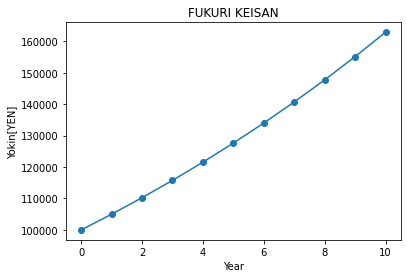

In [43]:
import matplotlib.pyplot as plt # プロットオブジェクトをインポート
riritsu = 0.05 # 利率
yokin = [100000] # 預金配列の最初の値は10 万
for i in range(10): #i の値を0 〜 9 まで、10 回繰り返す
  risoku = int(yokin[i]*riritsu) # 利息は現在の預金額× 利率( 整数化)
  yokin.append(yokin[i]+risoku) # 配列に計算結果を追加
plt.title("FUKURI KEISAN") # グラフのタイトル
plt.xlabel("Year") #X 軸のラベル
plt.ylabel("Yokin[YEN]") #Y 軸のラベル
plt.plot(yokin, marker="o") # グラフをプロット
plt.show() # プロットオブジェクトを表示

##確率モデル

不規則な現象を含んだモデル


In [44]:
import numpy.random as rd # 乱数を発生させる関数の呼び出し
ransuu = rd.rand() #0 〜 1 の乱数を1 個生成
print(" 乱数", ransuu) # 乱数の値を表示

 乱数 0.9354919005334824


In [45]:
import numpy as np # 整数をカウントするための関数呼び出し
import numpy.random as rd # 乱数を発生させる関数の呼び出し
saikoro = rd.randint(1, 6+1, 100) # サイコロを100 回振る
print(saikoro) # 乱数の値を表示
deme = [ ] # 出目の数を数える配列
for i in range(6):
  deme.append(np.count_nonzero(saikoro==i+1)) # 出現回数を数えて配列に追加
print(" 出現数:",deme) # 乱数の値を表示

[5 5 6 4 6 5 1 3 6 6 4 4 2 6 1 4 6 2 5 1 5 4 6 3 1 6 3 6 4 1 4 1 6 6 1 2 6
 5 3 2 6 2 5 3 1 2 4 2 1 5 6 1 2 5 1 6 2 3 4 6 6 1 1 6 1 1 5 6 6 1 3 1 1 4
 5 4 4 2 1 4 6 6 2 6 2 4 6 6 6 4 1 3 2 3 3 6 3 2 1 4]
 出現数: [21, 14, 11, 16, 11, 27]


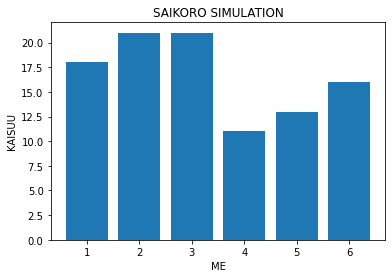

In [46]:
import numpy as np # 整数をカウントするための関数呼び出し
import numpy.random as rd # 乱数を発生させる関数の呼び出し
import matplotlib.pyplot as plt # グラフプロットの呼び出し
saikoro = rd.randint(1, 6+1, 100) # サイコロを100 回振る
deme = [ ] # 出目の数を数える配列
for i in range(6):
  deme.append(np.count_nonzero(saikoro==i+1)) # 数を数えて配列に追加
left = [1, 2, 3, 4, 5, 6] # グラフの左方向の値指定用
plt.title("SAIKORO SIMULATION") # グラフのタイトル
plt.xlabel("ME") #X 軸のラベル
plt.ylabel("KAISUU") #Y 軸のラベル
plt.bar(left, deme, align="center") # グラフをプロット
plt.show() # プロットオブジェクトを表示

In [47]:
saikoro==5

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False])

In [48]:
np.count_nonzero([False, False, True, True, False])

2

ライブラリを用いた例

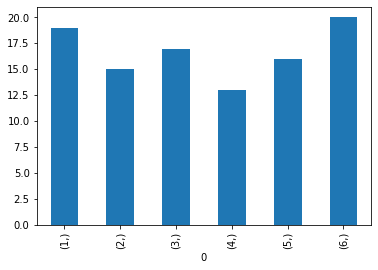

In [49]:
import numpy as np # 整数をカウントするための関数呼び出し
import numpy.random as rd # 乱数を発生させる関数の呼び出し
import matplotlib.pyplot as plt # グラフプロットの呼び出し
import pandas as pd
saikoro = rd.randint(1, 6+1, 100) # サイコロを100 回振る
df = pd.DataFrame(saikoro)
df.value_counts(sort=False).plot(kind="bar")

## モンテカルロ法

対象のモデルに乱数を大量に生成して入力し，近似解を得るもの  
例）円周率の計算


In [50]:
import numpy.random as rd # 乱数を発生させる関数の呼び出し
totalcount = 1000 # ランダムに打つ点の総数
incount = 0 # 円に入った点の数
for i in range(totalcount):
  x = rd.random() #0-1 の範囲の値
  y = rd.random() #0-1 の範囲の値
  if x**2 + y**2 < 1.0: # 単位円の中に入ったら
    incount += 1 # 入ったカウンターに１を加える
print(" 円周率:", incount * 4.0 / totalcount) # 求まった円周率

 円周率: 3.148


 円周率: 3.168


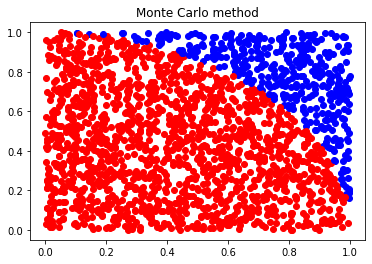

In [51]:
import numpy.random as rd # 乱数を発生させる関数の呼び出し
import matplotlib.pyplot as plt # グラフプロットの呼び出し
totalcount = 2000 # ランダムに打つ点の総数
incount = 0 # 円に入った点の数
for i in range(totalcount):
  x = rd.random() #0-1 の範囲の値
  y = rd.random() #0-1 の範囲の値
  if x**2 + y**2 < 1.0: # 単位円の中に入ったら
    incount += 1 # 入ったカウンターに１を加える
    plt.scatter(x, y, c="red") # 赤色でプロット
  else:
    plt.scatter(x, y, c="blue") # 青色でプロット
print(" 円周率:", incount * 4.0 / totalcount) # 求まった円周率
plt.title("Monte Carlo method") # グラフのタイトル
plt.show()

#学習17 自然現象のモデル化とシミュレーション

物体の放物運動のモデル化

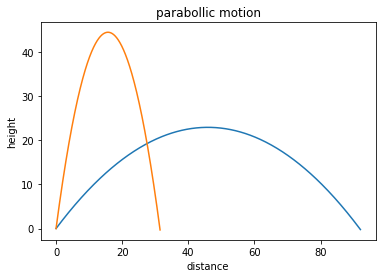

In [52]:
import math as math # 数値計算ライブラリ
import matplotlib.pyplot as plt # グラフ描画ライブラリ
dt = 0.01 # 微小時間( 時間間隔)
v0 = 30 # 初速度
g = 9.8 # 重力加速度
x = [0] # 水平位置の初期値0
y = [0] # 鉛直位置の初期値は0
angle = 45.0 * math.pi / 180.0 # 投げ上げ角度
vx = [v0*math.cos(angle)] # 水平方向の初速度
vy = [v0*math.sin(angle)] # 鉛直方向の初速度
for i in range(1000):
  vx.append(vx[i]) # 微小時間後の水平方向の速度
  vy.append(vy[i]-g*dt) # 微小時間後の鉛直方向の速度
  x.append(x[i]+vx[i]*dt) # 微小時間後の水平位置
  y.append(y[i]+(vy[i]+vy[i+1])/2.0*dt) # 微小時間後の鉛直位置
  if y[i] < 0 : # もし鉛直位置が0 を下回ったら
    break # ループ中断
plt.plot(x,y) # 位置の配列をプロット
plt.title("parabollic motion") # グラフのタイトル
plt.xlabel("distance") #x 軸ラベル
plt.ylabel("height") #y 軸ラベル

x = [0] # 水平位置の初期値0
y = [0] # 鉛直位置の初期値は0
angle = 80.0 * math.pi / 180.0 # 投げ上げ角度
vx = [v0*math.cos(angle)] # 水平方向の初速度
vy = [v0*math.sin(angle)] # 鉛直方向の初速度
for i in range(1000):
  vx.append(vx[i]) # 微小時間後の水平方向の速度
  vy.append(vy[i]-g*dt) # 微小時間後の鉛直方向の速度
  x.append(x[i]+vx[i]*dt) # 微小時間後の水平位置
  y.append(y[i]+(vy[i]+vy[i+1])/2.0*dt) # 微小時間後の鉛直位置
  if y[i] < 0 : # もし鉛直位置が0 を下回ったら
    break # ループ中断
plt.plot(x,y) # 位置の配列をプロット

plt.show()

生命体の増加シミュレーション


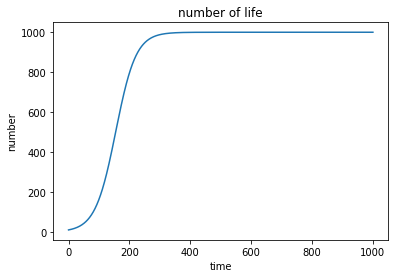

In [53]:
import matplotlib.pyplot as plt # グラフ描画ライブラリ
zouka = 0.03 # 増加率
capacity = 1000 # 環境収容数
n = [10] # 最初の個体数
for i in range(1000):
  zoukasuu = n[i]*zouka # 増加数
  gensyousuu = n[i]*(n[i]/capacity)*zouka # 減少数
  n.append(n[i]+(zoukasuu - gensyousuu)) # 個体数
plt.plot(n) # グラフにプロット
plt.title("number of life") # グラフのタイトル
plt.xlabel("time") #x 軸のラベル
plt.ylabel("number") #y 軸のラベル
plt.show()

ランダムウォークのシミュレーション

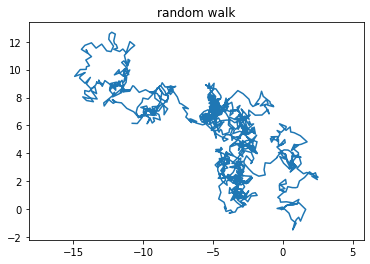

In [54]:
import matplotlib.pyplot as plt # グラフ描画ライブラリ
import numpy.random as rd # 乱数のためのライブラリ
x=[0] #X の初期値を0 にする
y=[0] #Y の初期値を0 にする
for i in range(1000):
  x.append(x[i]+rd.random() - 0.5) #X 方向
  y.append(y[i]+rd.random() - 0.5) #Y 方向
trace = [x, y] #XY 平面状の物体の座標をtrace という名前の配列に代入
plt.plot(*trace) # 配列要素のグラフ描画
plt.axis("equal") # グラフの縦横比を等しく
plt.title("random walk") # グラフのタイトルをつける
plt.show()

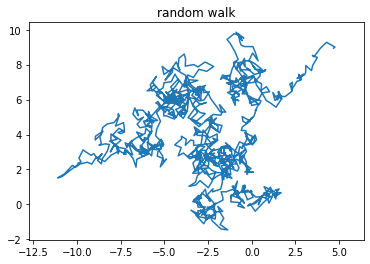

In [55]:
import matplotlib.pyplot as plt # グラフ描画ライブラリ
import numpy.random as rd # 乱数のためのライブラリ
x=[0] #X の初期値を0 にする
y=[0] #Y の初期値を0 にする
for i in range(1000):
  x.append(x[i]+rd.random() - 0.5) #X 方向
  y.append(y[i]+rd.random() - 0.5) #Y 方向
plt.plot(x, y) # そのまま引数にすればよい
plt.axis("equal") # グラフの縦横比を等しく
plt.title("random walk") # グラフのタイトルをつける
plt.show()

# 演習問題

p.123 演習1 図表3のコードをaの中の最小値を表示するように変更

p.123 演習2 図表5においてaとrの値を表示

## 解答例

In [56]:
#  演習1 
a = [56,3,62,17,87,22,36,83,21,12] 
saisyo = a[0]
for i in range(1,10,1):
  if a[i] < saisyo:
      saisyo = a[i]
print(saisyo)

3


In [57]:
# 演習2
import random #random モジュールを読み込む
a = 5
r = random.randrange(10) #0 ～ 9 までの整数をランダムに発生
print(f'a = {a},  r = {r}')
if a == r:
  print(" 当たり")
elif a > r:
  print("a の方が大きい")
elif a < r:
  print("a の方が小さい")

a = 5,  r = 2
a の方が大きい
